## 50.021 Artificial Intelligence
### Twitter Retweet Prediction
#### Submission Notebook
#####Noorbakht Khan (1003827)
#####Sidharth Praveen (1003647)
#####Suhas Sahu (1003370)
#####Tiffany Goh (1003674)


### Dataset Formatting

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Visualization

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
feature_names = ["tweetId", "username", "timestamp", "#followers", "#friends", "#retweets", "#favorites", "entities", "sentiment", "mentions", "hashtags", "urls"]

In [ ]:
INPUT_DIR = '/content/drive/MyDrive/ai_submission/data/'

In [ ]:
X_train = pd.read_csv(f'{INPUT_DIR}/train.csv', nrows = 100000)
X_train.columns = feature_names

In [ ]:
X_train["positive_sentiment"]=X_train['sentiment'].str.split(" ").apply(lambda x: int(x[0]))
X_train["negative_sentiment"]=X_train['sentiment'].str.split(" ").apply(lambda x: int(x[1]))

In [ ]:
X_train.head()

,tweetId,username,timestamp,#followers,#friends,#retweets,#favorites,entities,sentiment,mentions,hashtags,urls,positive_sentiment,negative_sentiment
0,1252529190278225920,1246dd69a108489e99a18e17ccbdda89,Tue Apr 21 09:26:44 +0000 2020,1066,956,1,1,onefour:Onefour:-1.9201282230056398;,1 -1,_onefour,null;,null;,1,-1
1,1215120881552384000,ee8757b8b51dfe14734d215ce0261f48,Thu Jan 09 03:59:28 +0000 2020,3559,4433,6,4,pedophile:Pedophilia:-1.5621082604699068;satan...,2 -3,realDonaldTrump,GodBlessAmerica Trump2020,null;,2,-3
2,1245110259024187393,1d7f59ee4f60e9f20d4a8a1a9f59cfe4,Tue Mar 31 22:06:33 +0000 2020,18394,17352,6,46,climate change:Global_warming:-2.1766696284542...,2 -1,DanRather,null;,null;,2,-1
3,1214240413189627905,a8fd8cd0b6d2cfda939a8ef257e60192,Mon Jan 06 17:40:48 +0000 2020,85346,6378,0,0,null;,1 -1,null;,null;,https://www.atlassian.com/blog/leadership/what...,1,-1
4,1210905251919859713,9bedd902dfabeb55e98d729f60c5c1f9,Sat Dec 28 12:48:04 +0000 2019,7967,988,47,109,zlatan ibile:Zlatan_%28musician%29:-1.36273775...,3 -1,Zlatan_Ibile,null;,null;,3,-1


In [ ]:
import os
os.getcwd()
os.chdir('/content/drive/MyDrive/ai_submission/')

In [ ]:
from plots import plot_correlation_heatmap, plot_histogram, plot_box_plot

In [ ]:
X_train['#retweets'].describe()

count    100000.000000
mean         40.985310
std         533.904785
min           0.000000
25%           0.000000
50%           0.000000
75%           9.000000
max       98346.000000
Name: #retweets, dtype: float64

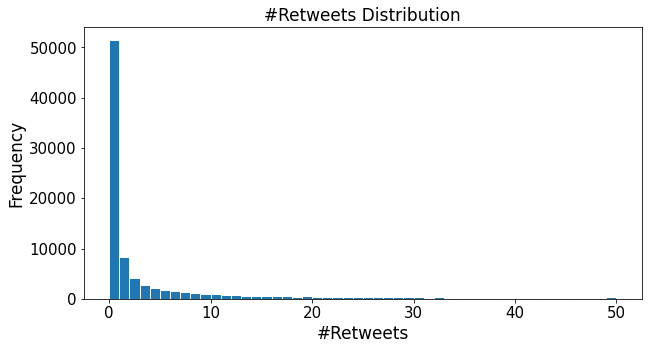

In [ ]:
plot_histogram(X_train['#retweets'], [0,50], '#Retweets', 'Frequency', '#Retweets Distribution')

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


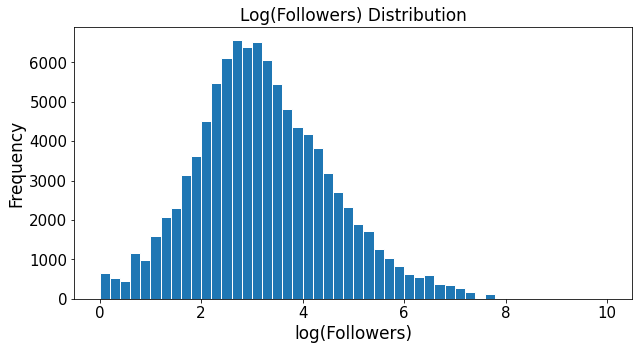

In [ ]:
df = np.log10(X_train['#followers'])

plot_histogram(df, [0,10], 'log(Followers)', 'Frequency', 'Log(Followers) Distribution')

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


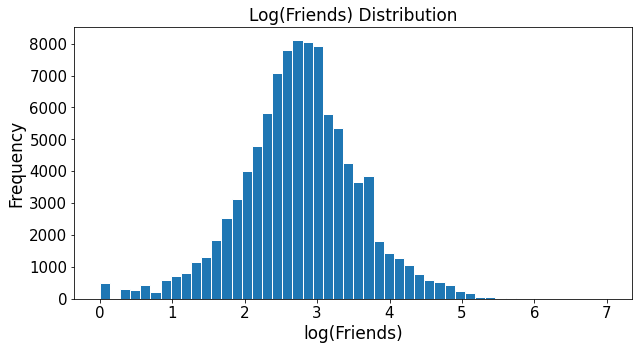

In [ ]:
df = np.log10(X_train['#friends'])

plot_histogram(df, [0,7], 'log(Friends)', 'Frequency', 'Log(Friends) Distribution')

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


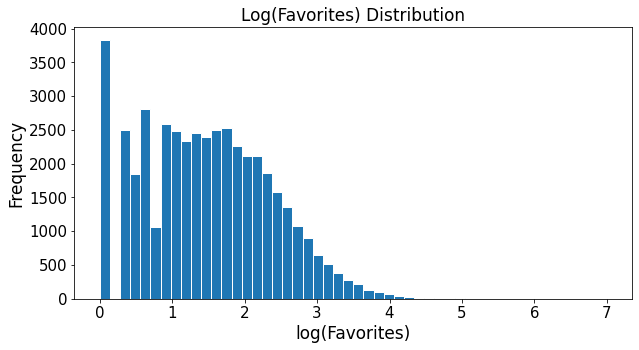

In [ ]:
df = np.log10(X_train['#favorites'])

plot_histogram(df, [0,7], 'log(Favorites)', 'Frequency', 'Log(Favorites) Distribution')

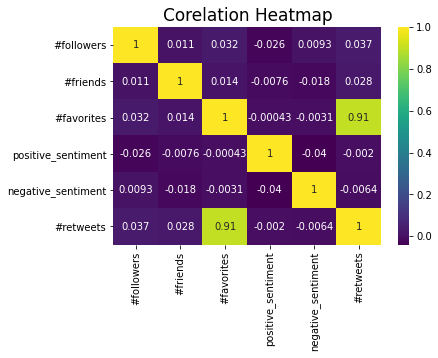

In [ ]:
 corr_columns=["#followers","#friends","#favorites","positive_sentiment","negative_sentiment","#retweets"]
 plot_correlation_heatmap(X_train, corr_columns)

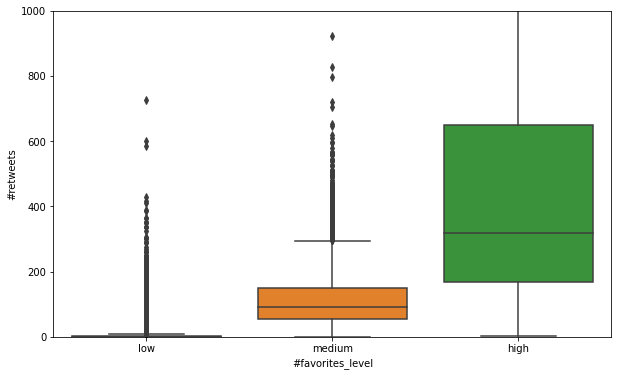

In [ ]:
X_train['#favorites_level'] = X_train['#favorites'].apply(lambda x: 'low' if x<187 else ('medium' if x<568 else 'high'))

plot_box_plot(X_train, '#retweets', '#favorites_level', 0, 1000)

### Data Preprocessing & Feature Engineering

In [20]:
import os
os.getcwd()
os.chdir('/content/drive/MyDrive/ai_submission/')

In [ ]:
os.listdir()

['data',
 '__pycache__',
 'features',
 'preprocess.py',
 'utils.py',
 'submission.ipynb',
 'plots.py']

In [25]:
input_dir = '/content/drive/MyDrive/ai_submission/data/'
feature_dir = '/content/drive/MyDrive/ai_submission/features/'

In [24]:
feature_list  = ["tweetId", "username", "timestamp", "#followers", "#friends", "#retweets", "#favorites", "entities", "sentiment", "mentions", "hashtags", "urls"]

In [22]:
import pandas as pd
X_train = pd.read_csv(f'{input_dir}/train.csv', nrows = 100000)
X_train.columns = feature_list

X_valid = pd.read_csv(f'{input_dir}/val.csv', nrows = 100000)
X_valid.columns = feature_list

X_test = pd.read_csv(f'{input_dir}/test.csv', nrows = 100000)
X_test.columns = feature_list

y_train = pd.read_csv(f'{input_dir}/train_labels.csv', header=None, nrows=100000, skiprows=1).T.values[0].reshape(-1, 1)

In [23]:
!pip install xfeat
!pip install mlflow
!pip install tqdm

In [26]:
from preprocess import init_features, preprocess

dense_features, sparse_features, varlen_sparse_features, to_encode_count, to_encode_target,\
         user_stats_features, time_cat_features, time_num_features, tweet_metrics_features, tweet_metrics_log_features,\
              tweet_metrics_bin_features = init_features()

In [ ]:
preprocess(feature_dir, X_train, X_valid, X_test, time_cat_features, time_num_features, tweet_metrics_features,\
        tweet_metrics_log_features, tweet_metrics_bin_features, to_encode_count, y_train, to_encode_target, varlen_sparse_features, \
            user_stats_features, dense_features, sparse_features)

Saving [weekday] to -> save_dir ... [/content/drive/MyDrive/ai_submission/features/]
Saving [hour] to -> save_dir ... [/content/drive/MyDrive/ai_submission/features/]
Saving [day] to -> save_dir ... [/content/drive/MyDrive/ai_submission/features/]
Saving [week_of_month] to -> save_dir ... [/content/drive/MyDrive/ai_submission/features/]
Saving [diff_from_latest] to -> save_dir ... [/content/drive/MyDrive/ai_submission/features/]
Applying log transformation...
Applying rank transformation...
Performing quantile binning...
Saving features...
Saving [#followers_qbin_10] to -> save_dir ... [/content/drive/MyDrive/ai_submission/features/]
Saving [#friends_qbin_10] to -> save_dir ... [/content/drive/MyDrive/ai_submission/features/]
Saving [#favorites_qbin_10] to -> save_dir ... [/content/drive/MyDrive/ai_submission/features/]
Saving [#followers__#favorites_qbin_10] to -> save_dir ... [/content/drive/MyDrive/ai_submission/features/]
Saving [#friends__#favorites_qbin_10] to -> save_dir ... [/c

  2%|▏         | 5573/300000 [00:00<00:05, 55723.28it/s]

Creating user-modelling features...


100%|██████████| 245131/245131 [04:47<00:00, 851.17it/s]
/content/drive/My Drive/ai_submission/preprocess.py:712: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#followers - MMS Scaling > max: 81250729, min: 0
Saving [#followers] to -> save_dir ... [/content/drive/MyDrive/ai_submission/features/]
#friends - MMS Scaling > max: 1887712, min: 0
Saving [#friends] to -> save_dir ... [/content/drive/MyDrive/ai_submission/features/]
#favorites - MMS Scaling > max: 788160, min: 0
Saving [#favorites] to -> save_dir ... [/content/drive/MyDrive/ai_submission/features/]
#followers__#favorites - MMS Scaling > max: 14198809863162, min: 0
Saving [#followers__#favorites] to -> save_dir ... [/content/drive/MyDrive/ai_submission/features/]
#friends__#favorites - MMS Scaling > max: 12831780819, min: 0
Saving [#friends__#favorites] to -> save_dir ... [/content/drive/MyDrive/ai_submission/features/]
#followers__#friends__#favorites - MMS Scaling > max: 205093421644774320, min: 0
Saving [#followers__#friends__#favorites] to -> save_dir ... [/content/drive/MyDrive/ai_submission/features/]
#followers_log - MMS Scaling > max: 18.213050363749144, min: 0.0
Saving [#foll

### Model Training

In [ ]:
from train import extract_saved_features

y_train = pd.read_csv(f'{input_dir}/train_labels.csv', header=None, nrows=100000, skiprows=1).T.values[0].reshape(-1, 1)

X_train, X_valid, X_test, unique_num_dic, feature_index, scaler, y_train =\
  extract_saved_features(dense_features, sparse_features, varlen_sparse_features, feature_dir, 5, y_train)

username
sentiment_pos
sentiment_neg
#followers_qbin_10
#friends_qbin_10
#favorites_qbin_10
#followers__#favorites_qbin_10
#friends__#favorites_qbin_10
#followers__#friends__#favorites_qbin_10
weekday
hour
day
week_of_month
entities_count
mentions_count
hashtags_count
urls_count
user_stats_cluster_1000
user_topic_cluster_1000
user_stats_topic_cluster_1000


In [27]:
varlen_sparse_features = []
FOLD_DIR = '/content/drive/MyDrive/ai_submission/fold'
SAVE_DIR = '/content/drive/MyDrive/ai_submission/save'

In [ ]:
from train import train
import torch

fold_best_scores, run_id = train(FOLD_DIR, SAVE_DIR, X_train, y_train, feature_index, unique_num_dic, scaler, batch_size=512, learning_rate=0.001, epochs=5, device=torch.device('cpu'), label_log_scaling=True,\
    sparse_features=sparse_features, dense_features=dense_features, varlen_sparse_features=varlen_sparse_features)

Training for Fold 0
Epoch 0/5


  0%|          | 0/176 [00:00<?, ?it/s]

Epoch 1/5


  0%|          | 0/176 [00:00<?, ?it/s]

Epoch 2/5


  0%|          | 0/176 [00:00<?, ?it/s]

Epoch 3/5


  0%|          | 0/176 [00:00<?, ?it/s]

Epoch 4/5


100%|██████████| 176/176 [01:30<00:00,  1.95it/s]


Training for Fold 1
Epoch 0/5


  0%|          | 0/176 [00:00<?, ?it/s]

Epoch 1/5


  0%|          | 0/176 [00:00<?, ?it/s]

Epoch 2/5


  0%|          | 0/176 [00:00<?, ?it/s]

Epoch 3/5


  0%|          | 0/176 [00:00<?, ?it/s]

Epoch 4/5


100%|██████████| 176/176 [01:32<00:00,  1.89it/s]


Training for Fold 2


  0%|          | 0/177 [00:00<?, ?it/s]

Epoch 0/5
Epoch 1/5


  0%|          | 0/177 [00:00<?, ?it/s]

Epoch 2/5


  0%|          | 0/177 [00:00<?, ?it/s]

Epoch 3/5


  0%|          | 0/177 [00:00<?, ?it/s]

Epoch 4/5


100%|██████████| 177/177 [01:30<00:00,  1.95it/s]


Training for Fold 3


  0%|          | 0/177 [00:00<?, ?it/s]

Epoch 0/5


  0%|          | 0/177 [00:00<?, ?it/s]

Epoch 1/5


  0%|          | 0/177 [00:00<?, ?it/s]

Epoch 2/5


  0%|          | 0/177 [00:00<?, ?it/s]

Epoch 3/5


  0%|          | 0/177 [00:00<?, ?it/s]

Epoch 4/5


100%|██████████| 177/177 [01:29<00:00,  1.98it/s]


Training for Fold 4
Epoch 0/5


  0%|          | 0/176 [00:00<?, ?it/s]

Epoch 1/5


  0%|          | 0/176 [00:00<?, ?it/s]

Epoch 2/5


  0%|          | 0/176 [00:00<?, ?it/s]

Epoch 3/5


  0%|          | 0/176 [00:00<?, ?it/s]

Epoch 4/5


100%|██████████| 176/176 [01:29<00:00,  1.97it/s]


In [28]:
from train import predict

In [29]:
folds = pd.read_csv(f'{FOLD_DIR}/train_folds_1month_5fold10_RS45.csv', nrows=100000)

In [30]:
run_id = '2dbad13188ee490ca2014a6cbe0e64f5'
fold_best_scores = {0: (0.2790325765610199,
  '/content/drive/MyDrive/ai_submission/save/model/train_weights_mlflow-2dbad13188ee490ca2014a6cbe0e64f5_fold0.h5'),
 1: (0.2747456689833666,
  '/content/drive/MyDrive/ai_submission/save/model/train_weights_mlflow-2dbad13188ee490ca2014a6cbe0e64f5_fold1.h5'),
 2: (0.2760519013162225,
  '/content/drive/MyDrive/ai_submission/save/model/train_weights_mlflow-2dbad13188ee490ca2014a6cbe0e64f5_fold2.h5'),
 3: (0.292361800574023,
  '/content/drive/MyDrive/ai_submission/save/model/train_weights_mlflow-2dbad13188ee490ca2014a6cbe0e64f5_fold3.h5'),
 4: (0.2917307979186951,
  '/content/drive/MyDrive/ai_submission/save/model/train_weights_mlflow-2dbad13188ee490ca2014a6cbe0e64f5_fold4.h5')}

In [ ]:
predict(run_id, fold_best_scores, feature_index, unique_num_dic, folds, X_train,\
        X_valid, X_test, batch_size=512, sparse_features=sparse_features, \
        dense_features=dense_features, varlen_sparse_features=varlen_sparse_features, \
        FOLD_NUM = 5, SAVE_DIR=SAVE_DIR)

In [32]:
from plots import plot_graph

In [40]:
loss_data_file = pd.read_csv(f'{SAVE_DIR}/model/loss_history-{run_id}_fold{4}.csv')

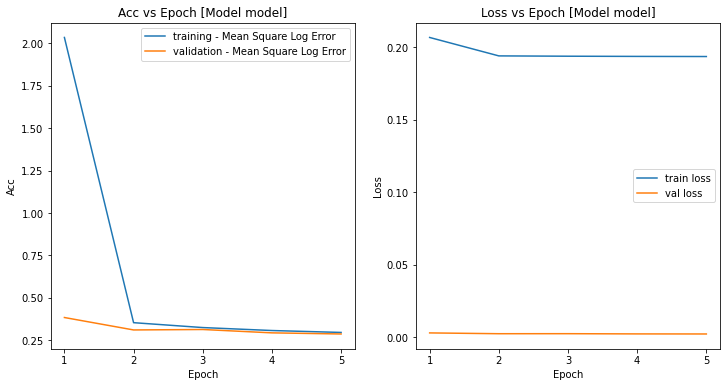

plot saved as modelmodel_graph.png




In [41]:
plot_graph(loss_data_file, 5, model = 'model')

In [50]:
import pandas as pd
run_id = '1b73f84eeee64eb3ac71789f5ce5783c'
x = pd.read_csv(f'{SAVE_DIR}/predict/preds_train_val_{run_id}.csv')

In [51]:
x.head()

,0.0
0,0.000000
1,0.000000
2,0.010284
3,0.000000
4,0.007077


Shown above, is the head of the dataframe for the prediction. The values represent the prediction (in log).